In [1]:
import zillow
import pandas as pd
import pprint
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
key='your_key'
api = zillow.ValuationApi()

In [2]:
os.chdir('C:\\Users\\feder\\Desktop\\SY_House')

In [3]:
df_add=pd.read_csv('SD_House_Addresses.csv')
postal_code ='92173'
df_add.tail()

,Address,City,State
3447,3378 Wittman Way,San Ysidro,CA
3448,3385 Wittman Way,San Ysidro,CA
3449,3386 Wittman Way,San Ysidro,CA
3450,3393 Wittman Way,San Ysidro,CA
3451,3394 Wittman Way,San Ysidro,CA


In [4]:
df_add['f_add']=df_add['Address']+', '+df_add['City']+', '+df_add['State']
df_add['f_add'][:10]

0    1703 Via Encantadoras, San Ysidro, CA
1    1705 Via Encantadoras, San Ysidro, CA
2    1707 Via Encantadoras, San Ysidro, CA
3    1711 Via Encantadoras, San Ysidro, CA
4    1715 Via Encantadoras, San Ysidro, CA
5    1719 Via Encantadoras, San Ysidro, CA
6    1723 Via Encantadoras, San Ysidro, CA
7    1727 Via Encantadoras, San Ysidro, CA
8    1731 Via Encantadoras, San Ysidro, CA
9    1737 Via Encantadoras, San Ysidro, CA
Name: f_add, dtype: object

In [5]:
def keys(x):
    c=x['links'].items()
    d=x['full_address'].items()
    e=x['zestimate'].items()
    f=x['local_realestate'].items()
    g=x['extended_data'].items()
    ap_list=[c,d,e,f,g]
    frames=pd.DataFrame()
    for i in ap_list:
        df= pd.DataFrame(i)
        frames = frames.append(df, ignore_index = True)
    frames=frames.T  
    frames.columns = frames.iloc[0]
    frames = frames[1:]
    return frames

In [13]:
df_zil=pd.DataFrame()
for i in df_add['f_add']:
    try:
        data = api.GetDeepSearchResults(key,i, postal_code)
        data_dict=data.get_dict()
        ads=keys(data_dict)
        df_zil=df_zil.append(ads,ignore_index = True)
    except:
        continue
print('Done!')
df_zil.to_csv('zillow_data.csv')

Done!


In [3]:
#This step is so I do not have to keep scraping everytime
df_zil=pd.read_csv('zillow_data.csv')

In [4]:
#df_zil.info()
df_zil.head().transpose()

,0,1,2,3,4
home_details,https://www.zillow.com/homedetails/1703-Via-En...,https://www.zillow.com/homedetails/1705-Via-En...,https://www.zillow.com/homedetails/1707-Via-En...,https://www.zillow.com/homedetails/1711-Via-En...,https://www.zillow.com/homedetails/1715-Via-En...
graphs_and_data,http://www.zillow.com/homedetails/1703-Via-Enc...,http://www.zillow.com/homedetails/1705-Via-Enc...,http://www.zillow.com/homedetails/1707-Via-Enc...,http://www.zillow.com/homedetails/1711-Via-Enc...,http://www.zillow.com/homedetails/1715-Via-Enc...
map_this_home,http://www.zillow.com/homes/111434535_zpid/,http://www.zillow.com/homes/17174251_zpid/,http://www.zillow.com/homes/17174252_zpid/,http://www.zillow.com/homes/17174253_zpid/,http://www.zillow.com/homes/17174254_zpid/
comparables,http://www.zillow.com/homes/comps/111434535_zpid/,http://www.zillow.com/homes/comps/17174251_zpid/,http://www.zillow.com/homes/comps/17174252_zpid/,http://www.zillow.com/homes/comps/17174253_zpid/,http://www.zillow.com/homes/comps/17174254_zpid/
street,1703 Via Encantadoras,1705 Via Encantadoras,1707 Via Encantadoras,1711 Via Encantadoras,1715 Via Encantadoras
zipcode,92173,92173,92173,92173,92173
city,San Ysidro,San Ysidro,San Ysidro,San Ysidro,San Ysidro
state,CA,CA,CA,CA,CA
latitude,32.5653,32.5653,32.5653,32.5653,32.5653
longitude,-117.062,-117.061,-117.061,-117.061,-117.061


In [5]:
df_zil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2646 entries, 0 to 2645
Data columns (total 35 columns):
home_details               2646 non-null object
graphs_and_data            2533 non-null object
map_this_home              2646 non-null object
comparables                2646 non-null object
street                     2646 non-null object
zipcode                    2646 non-null int64
city                       2646 non-null object
state                      2646 non-null object
latitude                   2646 non-null float64
longitude                  2646 non-null float64
amount                     2415 non-null float64
amount_currency            2646 non-null object
amount_last_updated        2646 non-null object
amount_change_30days       2405 non-null float64
valuation_range_low        2415 non-null float64
valuation_range_high       2415 non-null float64
region_name                2646 non-null object
region_id                  2646 non-null int64
region_type              

In [6]:
def to_float(x,cols):
    #"Takes in a Dataframe and desired columns and turns them into floating point numbers"
    for i in cols:
        x[i]=x[i].astype('float64')
    return x.info()
def to_cat(x,cols):
    #"Takes in a Dataframe and desired columns and turns them into categorical variables""
    for i in cols:
        x[i]=x[i].astype('category')
    return x.info()

In [7]:
#We will use these lists to construct a faster pipeline for naming our variables
float_cols=['amount','tax_assessment','tax_assessment_year','year_built','lot_size_sqft','finished_sqft','bathrooms','bedrooms','last_sold_price']
cat_cols=['region_type','usecode']

In [8]:
#Drop all of the missing values in which amount was not present this can cause a systematic bias as we want only categories in which amount is present.
df_zil=df_zil.replace('None',np.nan)
df_zil=df_zil.dropna(subset=['amount'])

C:\Users\feder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


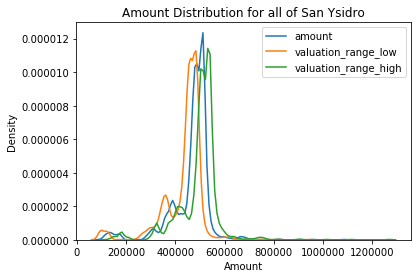

In [9]:
#Look at the distribution of our amount variable and we can see that
%matplotlib
sns.kdeplot(df_zil.amount)
sns.kdeplot(df_zil.valuation_range_low)
sns.kdeplot(df_zil.valuation_range_high)
plt.title('Amount Distribution for all of San Ysidro')
plt.ylabel('Density')
plt.xlabel('Amount')
plt.show()

In [10]:
#I am very interested in knowing which streets hold the most value.
df_zil['street_iso'] = df_zil['street'].str.replace('\d+', '')
df_zil['street_iso'] = df_zil['street_iso'].str.replace('/ ', '')
df_zil['street_iso'] = df_zil['street_iso'].str.replace('-', '')
df_street=df_zil.groupby('street_iso').amount.describe()

In [116]:
#plotting in Seaborn our Bar Graph in order to see which streets are the most profitable limiting them to streets with 10 houses or more
df_street_adj=df_street[df_street['count']>=10.0]
df_street_adj.head()
df_street_adj.to_csv('add_tab_data.csv')

C:\Users\feder\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


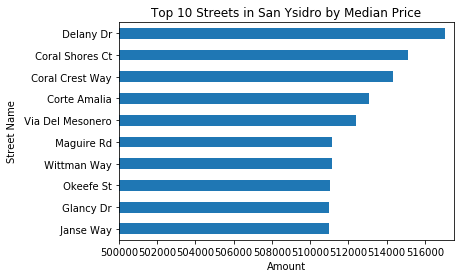

In [12]:
#What are the top 10 streets to live in San Ysidro
df_street_adj.sort_values('50%',axis=0,ascending=True,inplace=True)
df_street_adj['50%'][-10:].plot(kind='barh')
plt.title('Top 10 Streets in San Ysidro by Median Price')
plt.xlabel('Amount')
plt.ylabel('Street Name')
plt.xlim(500000,517500)
plt.show()

In [13]:
#Change my variables to use Machine Learning applications
to_float(df_zil,float_cols)
to_cat(df_zil,cat_cols)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2415 entries, 0 to 2645
Data columns (total 36 columns):
home_details               2415 non-null object
graphs_and_data            2324 non-null object
map_this_home              2415 non-null object
comparables                2415 non-null object
street                     2415 non-null object
zipcode                    2415 non-null int64
city                       2415 non-null object
state                      2415 non-null object
latitude                   2415 non-null float64
longitude                  2415 non-null float64
amount                     2415 non-null float64
amount_currency            2415 non-null object
amount_last_updated        2415 non-null object
amount_change_30days       2405 non-null float64
valuation_range_low        2415 non-null float64
valuation_range_high       2415 non-null float64
region_name                2415 non-null object
region_id                  2415 non-null int64
region_type              

In [14]:
#Now we can begin imputing missing values into our floating point numbers using the mean
for i in float_cols:
    df_zil[i]=df_zil[i].replace(np.nan,df_zil[i].mean())

In [124]:
%matplotlib
sns.regplot(y='amount',x='finished_sqft',data=df_zil)
plt.title('Linear Regression Estimation')
plt.xlabel('Finished Square Feet')
plt.ylabel('Amount')
plt.show()

Using matplotlib backend: Qt5Agg


C:\Users\feder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [125]:
#Corrgram to see potential coefficients
df_corr=df_zil.corr()
df_corr.dropna(inplace=True,how='all')
df_corr.dropna(inplace=True,how='all',axis=1)
sns.heatmap(df_corr,annot=True)

In [16]:
#I am going to encode my codeuse variable as those categories hold importance when dealing with this type of dataset
print(df_zil.usecode.value_counts())
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df_zil.usecode= le.fit_transform(df_zil.usecode) 

SingleFamily       2142
Condominium         179
MultiFamily2To4      47
Townhouse            24
Duplex               21
Miscellaneous         2
Name: usecode, dtype: int64


In [17]:
#One hot encoding
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0]) 
np_encode = onehotencoder.fit_transform(df_zil[['usecode']]).toarray() 
df_encode=pd.DataFrame(np_encode)

In [18]:
#Joining both dataframes together
df_encode.columns=('Condominium','Duplex','Misc','Multi2to4','SingleFam','Townhouse')
df_encode.info()
df_zil.reset_index(inplace=True)
df_clean=pd.concat([df_zil,df_encode],axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2415 entries, 0 to 2414
Data columns (total 6 columns):
Condominium    2415 non-null float64
Duplex         2415 non-null float64
Misc           2415 non-null float64
Multi2to4      2415 non-null float64
SingleFam      2415 non-null float64
Townhouse      2415 non-null float64
dtypes: float64(6)
memory usage: 113.3 KB


,index,home_details,graphs_and_data,map_this_home,comparables,street,zipcode,city,state,latitude,...,last_sold_date,last_sold_price,complete,street_iso,Condominium,Duplex,Misc,Multi2to4,SingleFam,Townhouse
0,0,https://www.zillow.com/homedetails/1703-Via-En...,http://www.zillow.com/homedetails/1703-Via-Enc...,http://www.zillow.com/homes/111434535_zpid/,http://www.zillow.com/homes/comps/111434535_zpid/,1703 Via Encantadoras,92173,San Ysidro,CA,32.565261,...,NaN,280144.185802,True,Via Encantadoras,0.0,0.0,0.0,0.0,1.0,0.0
1,1,https://www.zillow.com/homedetails/1705-Via-En...,http://www.zillow.com/homedetails/1705-Via-Enc...,http://www.zillow.com/homes/17174251_zpid/,http://www.zillow.com/homes/comps/17174251_zpid/,1705 Via Encantadoras,92173,San Ysidro,CA,32.565264,...,NaN,280144.185802,True,Via Encantadoras,0.0,0.0,0.0,0.0,1.0,0.0
2,2,https://www.zillow.com/homedetails/1707-Via-En...,http://www.zillow.com/homedetails/1707-Via-Enc...,http://www.zillow.com/homes/17174252_zpid/,http://www.zillow.com/homes/comps/17174252_zpid/,1707 Via Encantadoras,92173,San Ysidro,CA,32.565266,...,9/29/2003,349000.000000,True,Via Encantadoras,0.0,0.0,0.0,0.0,1.0,0.0
3,3,https://www.zillow.com/homedetails/1711-Via-En...,http://www.zillow.com/homedetails/1711-Via-Enc...,http://www.zillow.com/homes/17174253_zpid/,http://www.zillow.com/homes/comps/17174253_zpid/,1711 Via Encantadoras,92173,San Ysidro,CA,32.565266,...,11/9/2001,229000.000000,True,Via Encantadoras,0.0,0.0,0.0,0.0,1.0,0.0
4,4,https://www.zillow.com/homedetails/1715-Via-En...,http://www.zillow.com/homedetails/1715-Via-Enc...,http://www.zillow.com/homes/17174254_zpid/,http://www.zillow.com/homes/comps/17174254_zpid/,1715 Via Encantadoras,92173,San Ysidro,CA,32.565277,...,2/28/2011,247000.000000,True,Via Encantadoras,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
#NOw we have a clean data set which we can use to run our models first Train test split
# Import train_test_split
from sklearn.model_selection import train_test_split
X=df_clean[['year_built','finished_sqft','bathrooms','bedrooms','Duplex','Misc','Multi2to4','SingleFam','Townhouse']]
y=np.log(df_clean[['amount']])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [77]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit(X_train)
rescaledX_train = scaler.transform(X_train)
rescaledX_test = scaler.fit(X_test)
rescaledX_test = scaler.transform(X_test)

In [126]:
#Using Linear Regression and using MAE to calculate accuracy
from sklearn.linear_model import LinearRegression
reg_model=LinearRegression()
reg_model.fit(rescaledX_train,y_train)
reg_prediction=reg_model.predict(rescaledX_test)

#Calculate RootMSE for reg prediction

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
MAE_lin=mean_absolute_error(y_test,reg_prediction)
print('RMSE Linear Regression:',MAE_lin)

RMSE Linear Regression: 0.10517259742750522


In [127]:
#Using Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor(max_depth=4,random_state=0,n_estimators=200)
RF_model.fit(rescaledX_train,y_train)
RF_prediction=RF_model.predict(rescaledX_test)
#Score
MAE_RF=mean_absolute_error(y_test,RF_prediction)
print('MAE RF Regression:',MAE_RF)

C:\Users\feder\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


MAE RF Regression: 0.09014365552057511


In [128]:
#Using XGBoost
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, gamma = 0, n_estimators = 1000)
xg_reg.fit(rescaledX_train,y_train)

preds = xg_reg.predict(rescaledX_test)
#Score
xgb_MAE=mean_absolute_error(y_test,preds)
print('MAE XGB Regression:',xgb_MAE)

MAE XGB Regression: 0.10271644627869736


In [140]:
results={'MAE Linear': MAE_lin,
        'MAE RF': MAE_RF,
        'MAE XGB':xgb_MAE}
results=pd.DataFrame.from_dict(results,orient='index',columns=['Result'])
#results.plot(kind='bar')
print(results)

              Result
MAE Linear  0.105173
MAE RF      0.090144
MAE XGB     0.102716
